In [340]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
import seaborn as sns

# Modélisation du Dataframe

In [341]:
pd.options.display.max_columns = 150

### Chargement du DataFrame

In [342]:
df = pd.read_csv('kc_house_data_clean.csv')
print(df.shape)
df.describe()

(21596, 20)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.401983e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.007548,0.234303,3.409752,7.657946,1788.631506,291.711660,1971.000787,84.468698,98077.950685,47.560087,-122.213977,1986.650722,12758.656649,2014.322976
std,3.671416e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.086551,0.766406,0.650471,1.173218,827.763251,442.673703,29.375460,401.830330,53.514040,0.138552,0.140725,685.231768,27275.018316,0.467625
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


In [343]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  int64  
 7   view           21596 non-null  int64  
 8   condition      21596 non-null  int64  
 9   grade          21596 non-null  int64  
 10  sqft_above     21596 non-null  int64  
 11  sqft_basement  21596 non-null  int64  
 12  yr_built       21596 non-null  int64  
 13  yr_renovated   21596 non-null  int64  
 14  zipcode        21596 non-null  int64  
 15  lat            21596 non-null  float64
 16  long           21596 non-null  float64
 17  sqft_living15  21596 non-null  int64  
 18  sqft_l

In [345]:
df.corrwith(df.price)

price            1.000000
bedrooms         0.315966
bathrooms        0.525915
sqft_living      0.701921
sqft_lot         0.089885
floors           0.256831
waterfront       0.266438
view             0.397323
condition        0.036000
grade            0.667935
sqft_above       0.605395
sqft_basement    0.323772
yr_built         0.053995
yr_renovated     0.126418
zipcode         -0.053443
lat              0.306772
long             0.022103
sqft_living15    0.585273
sqft_lot15       0.082841
year             0.003757
dtype: float64

### Séparation des données en deux (Entrainement et Test)

In [346]:
y = df["price"]
X = df.drop("price", axis=1)


### Creation des pipelines

In [347]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

print(X_train.shape); print(X_test.shape)
print(y.shape)

(16197, 19)
(5399, 19)
(21596,)


### Modélisation

In [348]:
# Transformation
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [349]:
# Modèle de Regression Linéaire


model_lr= make_pipeline(preprocessing, LinearRegression())

model_lr.fit(X_train,y_train)
model_lr.score(X_test,y_test)*100



82.48125914944359

In [350]:
# Méthode de Regression de Ridge

model_ridge = make_pipeline(preprocessing, Ridge())


model_ridge.fit(X_train, y_train)
model_ridge.score(X_test, y_test)*100

82.46914663608752

In [351]:
# Modèle Lasso

model_lasso = make_pipeline(preprocessing, Lasso())


model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)*100



/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+14, tolerance: 2.071e+11
  model = cd_fast.enet_coordinate_descent(


82.45145766327151

In [352]:
# Modèle Elastic Net

model_elastic = make_pipeline(preprocessing, ElasticNet())


model_elastic.fit(X_train, y_train)
model_elastic.score(X_test, y_test)*100

79.63488421175214

In [353]:
y_pred = model_lr.predict(X_train)

In [354]:
residual = (y_train - y_pred).abs().sort_values()

In [355]:
to_drop = residual[residual > 700000].index

In [356]:
df_cleaned = df.drop(to_drop)

In [357]:
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21592,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21593,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21594,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


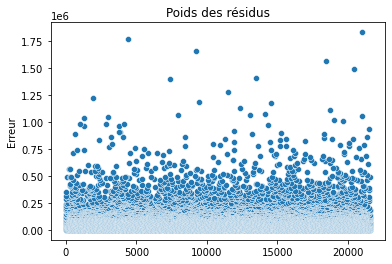

In [358]:


sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('Erreur')
plt.show()



In [359]:
X = df_cleaned.drop('price', axis=1)
y = df_cleaned.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [360]:
model_lr = make_pipeline(preprocessing, LinearRegression())
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)*100

83.73448285622706

In [366]:
import pickle
# Sauvegarder dans un fichier dans le dossier de travail
pkl_kch_filename = "pickle_model_lr.pkl"
with open("pkl_kch_filename", 'wb') as file:
    pickle.dump(model_lr, file)
